# Exercises for Lecture 12 (Introduction to Keras)

In [24]:
import datetime
now = datetime.datetime.now()
print("Last executed: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Last executed: 2024-02-28 17:18:07


In [25]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
np.random.seed(42)
tf.random.set_seed(42)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

Consider the California housing regression dataset again.

In [26]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

Split the data into training, validation and test sets.

In [27]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

Scale features to standardise.

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

## Exercise 1: Build a regression model using the Sequential API

Build a sequential model to estimate house prices with one hidden layer with 30 neurons and a ReLU activation function.

In [29]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
print(model.summary())
print(X_train.shape[1:])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 30)                270       
                                                                 
 dense_15 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
(8,)


Compile the model with a mean squared error loss fucntion and a SGD optimiser with a learning rate of 1e-3.

In [30]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.legacy.SGD(learning_rate=1e-4))

Fit the model over 20 epochs, evaluting it on the validation data during training.

In [31]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20


363/363 [==============================] - 1s 1ms/step - loss: 4.7472 - val_loss: 5.1879
Epoch 2/20
363/363 [==============================] - 0s 897us/step - loss: 3.5941 - val_loss: 5.0837
Epoch 3/20
363/363 [==============================] - 0s 885us/step - loss: 2.8502 - val_loss: 4.9631
Epoch 4/20
363/363 [==============================] - 0s 858us/step - loss: 2.3424 - val_loss: 4.6981
Epoch 5/20
363/363 [==============================] - 0s 855us/step - loss: 1.9774 - val_loss: 4.3258
Epoch 6/20
363/363 [==============================] - 0s 880us/step - loss: 1.7052 - val_loss: 3.9154
Epoch 7/20
363/363 [==============================] - 0s 856us/step - loss: 1.4975 - val_loss: 3.4768
Epoch 8/20
363/363 [==============================] - 0s 895us/step - loss: 1.3361 - val_loss: 3.0458
Epoch 9/20
363/363 [==============================] - 0s 849us/step - loss: 1.2086 - val_loss: 2.6510
Epoch 10/20
363/363 [==============================] - 0s 942us/step - loss: 1.1072 - val_loss:

Evaluate the model on the test data.

In [32]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 619us/step - loss: 0.7267


Make direct predictions on the first three instances in the test set.

In [33]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 38ms/step


array([[0.7252618],
       [1.0801247],
       [1.868783 ]], dtype=float32)

Plot the model history.

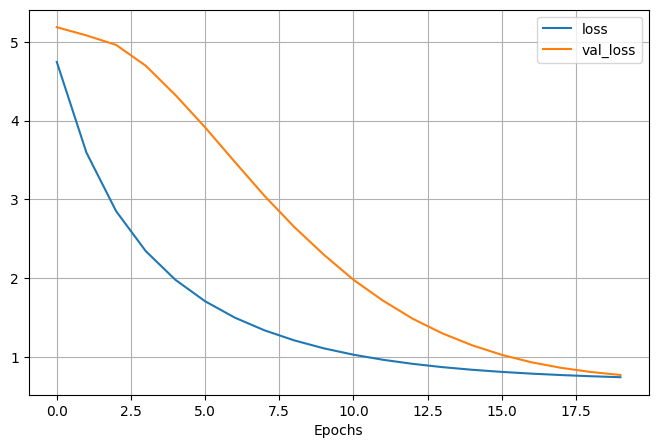

In [34]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 2)
plt.xlabel("Epochs")
plt.show()